# ロジスティク回帰

・いくつかの説明変数から確率を計算して予測を行うモデル  
・一般化線形モデルの一種  
・回帰と言っているが分類で使われることが多い

## 2値分類ロジスティク回帰

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [29]:
from sklearn import datasets
boston = datasets.load_digits()

In [32]:
boston.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
list(map(str, boston.target_names))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
dir(boston)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
iris = load_iris()
print(iris)

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 花びらの長さ（petal length (cm)）からtargetを予測してみる

In [21]:
x = iris.data[50:, 2].reshape(-1,1)
y = iris.target[50:] - 1

In [22]:
x

array([[4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
       [4. ],
       [4.9],
       [4.7],
       [4.3],
       [4.4],
       [4.8],
       [5. ],
       [4.5],
       [3.5],
       [3.8],
       [3.7],
       [3.9],
       [5.1],
       [4.5],
       [4.5],
       [4.7],
       [4.4],
       [4.1],
       [4. ],
       [4.4],
       [4.6],
       [4. ],
       [3.3],
       [4.2],
       [4.2],
       [4.2],
       [4.3],
       [3. ],
       [4.1],
       [6. ],
       [5.1],
       [5.9],
       [5.6],
       [5.8],
       [6.6],
       [4.5],
       [6.3],
       [5.8],
       [6.1],
       [5.1],
       [5.3],
       [5.5],
       [5. ],
       [5.1],
       [5.3],
       [5.5],
       [6.7],
       [6.9],
       [5. ],
       [5.7],
      

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
# 標準化
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [33]:
log_reg = LogisticRegression().fit(x_train, y_train)

In [36]:
log_reg.intercept_, log_reg.coef_  # 切片と傾き(coefficient)

(array([0.29946432]), array([[3.16390488]]))

In [39]:
print(log_reg.score(x_train, y_train))
print(log_reg.score(x_test, y_test))

0.9466666666666667
0.88


## 多項ロジスティク回帰（多クラス分類）

#### 名義ロジスティク回帰・・・クラス間に順序がない場合の多クラス分類（本稿で扱う）

#### 順序ロジスティク回帰・・・クラス間に順序がある場合の多クラス分類

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [42]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [43]:
x = digits.data
y = digits.target

In [44]:
x.shape

(1797, 64)

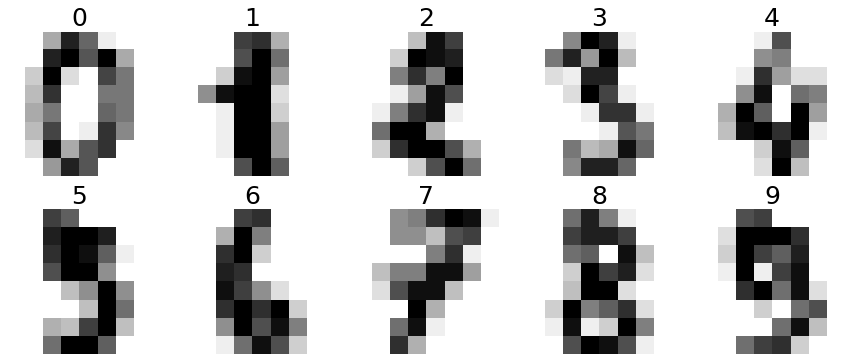

In [49]:
images_with_labels = list(zip(digits.images, digits.target))

plt.figure(figsize=(15, 6))

for idx, (image, label) in enumerate(images_with_labels[:10]):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('{}'.format(label), fontsize=25)
plt.show()

In [51]:
digits.images.shape

(1797, 8, 8)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [56]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [57]:
log_reg = LogisticRegression().fit(x_train_scaled, y_train)

In [ ]:
log_reg.intercept_, log_reg.coef_

In [60]:
log_reg.coef_.shape

(10, 64)

In [61]:
prediction = log_reg.predict(x_test_scaled)
prediction

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [63]:
prediction == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion = confusion_matrix(prediction, y_test)
confusion

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 46]], dtype=int64)

In [66]:
log_reg.score(x_test_scaled, y_test)

0.9733333333333334